# Transfer Learning

Install dependencies

This fiel will be updated iteratively

In [258]:
%matplotlib inline  
import numpy as np
from keras.datasets import cifar10
#from keras.applications.resnet50 import ResNet50, preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.utils import np_utils
from skimage.transform import resize as imresize
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
#from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

**Task 1**: Load the cifar10 data set into two tuples x_train, x_test and y_train, y_test (https://keras.io/datasets/)

In [259]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

We are only working with a small part of the data as we train on cpu. Thus we have to reduce the amount of data...

**Task 2**: Sample the data with a factor of 1% and save it to respective vars.

In [260]:
sampleFactor = 0.01
x_train = x_train[0:int(len(x_train)*sampleFactor)]
y_train = y_train[0:int(len(y_train)*sampleFactor)]
x_test = x_test[0:int(len(x_test)*sampleFactor)]
y_test = y_test[0:int(len(y_test)*sampleFactor)]

**Task 3**: Define a list with all cifar10 classes (https://www.cs.toronto.edu/~kriz/cifar.html). Then retrieve some information on the train and test set.

In [261]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
type(cifar_classes)
num_classes = np.unique(y_train).shape[0]

print("There are {} train images and {} test images.".format(x_train.shape[0], x_test.shape[0]))
print('There are {} unique classes to predict.'.format(num_classes))
print('Example training images and their labels: ' + str([y[0] for y in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[y[0]] for y in y_train[0:10]]))

There are 500 train images and 100 test images.
There are 10 unique classes to predict.
Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


**Task 4**: Print the shape of an image. 

In [262]:
#Shape of an Image
x_train[0].shape

(32, 32, 3)

**Task 5**: Plot the first ten images of the dataset. 

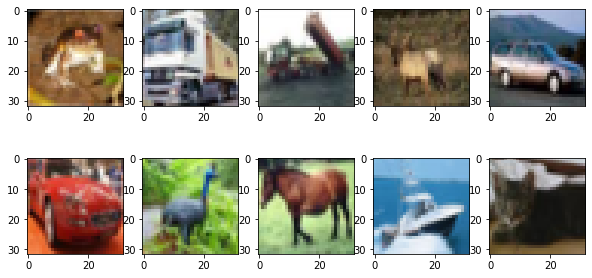

In [263]:
#Example images
fig = plt.figure(figsize=(10,5))
cols = 5
rows = 2
for i in range (1,cols*rows+1):
    image = x_train[i-1]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image)
plt.show()

**Task6**: Transform the lables into one-hot encoding

In [264]:
#Label encoding
#shape before encoding
y_train.shape
#shape after encoding
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train.shape

(500, 10)

**Task 7**: Define the following sequential CNN model:

- 2D Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
- Max Pool layer with size 2×2
- 2D Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
- Max Pool layer with size 2×2
- 2D Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
- Max Pool layer with size 2×2
- 2D Global Average Pooling layer
- Fully connected output layer (dense layer) with 10 units and a softmax activation function

Use the keras documentation at https://keras.io/ (e.g., convolutional or core)

Afterwards plot the model into a file (https://keras.io/visualization/#model-visualization). 

In [265]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation='softmax'))
model.summary()
plot_model(model, show_shapes = True , to_file='model.png' , show_layer_names = True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 64)              

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

**Task 8:** Compile the model with binary crossentropy as a loss function and Adam as the optimizer. Print accuracy as the metric.

Read more about the Adam optimizer here https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/.

In [266]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

**Task 9**: Now we want to fit the model using a validation split of 20%. Experiment with different amount of epochs and batch sizes. Print the score of the model.

In [267]:
model.fit(x_train, y_train, batch_size=32, epochs=5,verbose=1, validation_split=0.2, shuffle=True)


Epoch 1/5
13/13 [==============================] - 1s 34ms/step - loss: 21.3039 - accuracy: 0.1094 - val_loss: 5.2973 - val_accuracy: 0.1000
Epoch 2/5
13/13 [==============================] - 0s 20ms/step - loss: 3.4817 - accuracy: 0.1586 - val_loss: 2.5428 - val_accuracy: 0.2000
Epoch 3/5
13/13 [==============================] - 0s 23ms/step - loss: 2.3432 - accuracy: 0.1989 - val_loss: 2.4561 - val_accuracy: 0.1600
Epoch 4/5
13/13 [==============================] - 0s 21ms/step - loss: 2.2984 - accuracy: 0.2012 - val_loss: 2.3744 - val_accuracy: 0.1800
Epoch 5/5
13/13 [==============================] - 0s 22ms/step - loss: 2.0820 - accuracy: 0.2679 - val_loss: 2.3409 - val_accuracy: 0.1700


In [268]:
score = model.evaluate(x_test, y_test)
print(score[1])

4/4 [==============================] - 0s 5ms/step - loss: 2.2425 - accuracy: 0.1800
0.18000000715255737


**Task 10**: Resize the images to 224x224. And plot an old and a new image for comparison.

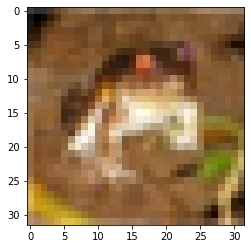

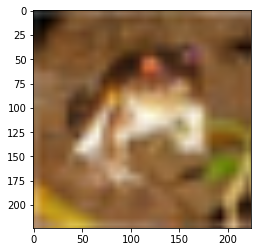

In [269]:
#the image is resized to be compatible with the pretrained net
x_train_new = np.array([imresize(x_train[i], (224, 224, 3)) for i in range(0, len(x_train))]).astype('float32')
x_test_new = np.array([imresize(x_test[i], (224, 224, 3)) for i in range(0, len(x_test))]).astype('float32')

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train_new[0])
plt.show()

**Task 11**: Create an InceptionV3 model named base_model with initialized weights from imagenet (https://keras.io/applications/#inceptionv3)

In [271]:
base_model = InceptionV3(weights='imagenet',include_top = False)

**Task 12**: Add layers to the Inception Model with a GlobalAveragePooling2D, a fully connected layer with a ReLu activation function, a Dropout Layer and a Prediction Layer for our 10 classes.

In [272]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(10,activation='softmax')(x)

**Task 13**: Freeze the Layers of the base_model

In [273]:
#Freezing layers of InceptionModel
for layer in base_model.layers:
    layer.trainable = False

**Task 14**: Print a summary of the base_model

In [274]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_130 (Conv2D)             (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_130[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

**Task 15**: Now build a model starting with the input of the base_model and resulting in the predictions as an output. Summarize and plot the model as above.

In [275]:
model = Model(inputs=base_model.input,outputs=predictions)
model.summary()
plot_model(model, show_shapes=True, to_file='model_inception.png', show_layer_names=True) #change Outputfile name

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_130 (Conv2D)             (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_130[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

**Task 16**: Print the names of the layers.

In [276]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_4
1 conv2d_130
2 batch_normalization_94
3 activation_94
4 conv2d_131
5 batch_normalization_95
6 activation_95
7 conv2d_132
8 batch_normalization_96
9 activation_96
10 max_pooling2d_33
11 conv2d_133
12 batch_normalization_97
13 activation_97
14 conv2d_134
15 batch_normalization_98
16 activation_98
17 max_pooling2d_34
18 conv2d_138
19 batch_normalization_102
20 activation_102
21 conv2d_136
22 conv2d_139
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_135
29 conv2d_137
30 conv2d_140
31 conv2d_141
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_145
42 batch_normalization_109
43 activation_109
44 conv2d_143
45 conv2d_146
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_142
52 conv2d_144
5

**Opt. Task 17**: How could you freeze more layers?

In [255]:
#for layer in model.layers[249:]:
#   layer.trainable = True

**Task 18**: Compile the model with a loss function, an optimizer and additionally accuracy as a metric. If you have time left. Try a SGD optimizer instead.

In [277]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

**Task 19**: Train the model. You can experiment with epochs and batch sizes. But be careful it is a very large net that takes a lot of training. Use a validation split of 0.1

In [280]:
model.fit(x_train_new, y_train, batch_size=32, epochs=5,verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/5


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

**Task 20**: Compare both models (task 19 and task 9)